In [212]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Implement me
# Set working directory
directory = '/content/drive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import spacy
import textacy.extract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,12

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
pip install textacy

ERROR! Session/line number was not unique in database. History logging moved to new session 59
     |████████████████████████████████| 215kB 434kB/s 
     |████████████████████████████████| 143kB 43.6MB/s 
     |████████████████████████████████| 481kB 35.9MB/s 
     |████████████████████████████████| 3.0MB 40.1MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=73003 sha256=f21e43dd85f9d7c39453708cb8a849d3c366c165fae36fa0ec23957503053cd9
  Stored in directory: /root/.cache/pip/wheels/e8/fe/99/d8fa8f2ef7b82a625b0b77a84d319b0b50693659823c4effb4
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1257056 sha256=8794e5d9ed79861e4d398f9394ab9f7b88c979c44f9505e3e82e85dd17ba3ffb
  Stored in directory: /root/.cache/pip/wheels/64/2a/18/d962b614e055577e7d9a3e4813e0742f822ca9c8800cc3783a
Successfully built jellyfish cytoolz


In [62]:
trump = pd.read_csv(directory + 'NLP_The-2020-Presidential-Race-master/Data/Trump/Trump_NYT.csv')
# trump_1 = pd.read_csv(directory + 'NLP_The-2020-Presidential-Race-master/Data/Trump/Trump_NYT_1.csv')
trump.head(3)

,web-scraper-order,web-scraper-start-url,link,link-href,title,text,media,word_count,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,1585418062-1032,https://search-proquest-com.proxygw.wrlc.org/r...,Full text,https://search-proquest-com.proxygw.wrlc.org/d...,Primary Battles on the Right? They Seem Less S...,Hide highlightingFull TextTranslateUndo Transl...,New York Times,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1585418753-1075,https://search-proquest-com.proxygw.wrlc.org/r...,Full text,https://search-proquest-com.proxygw.wrlc.org/d...,Collins Will Not Support Removal of the Presid...,Full TextTranslateUndo Translation FromToTrans...,New York Times,1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1585417950-1025,https://search-proquest-com.proxygw.wrlc.org/r...,Full text,https://search-proquest-com.proxygw.wrlc.org/d...,Trump's Legal Warrior Jabs Back at His Boss. I...,Hide highlightingFull TextTranslateUndo Transl...,New York Times,1578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('There are {} rows and {} columns in train'.format(trump.shape[0],trump.shape[1]))

There are 181 rows and 61 columns in train


In [191]:
trump_text = trump.text.loc[~trump.text.isnull()]
trump_text

0      Hide highlightingFull TextTranslateUndo Transl...
1      Full TextTranslateUndo Translation FromToTrans...
2      Hide highlightingFull TextTranslateUndo Transl...
3      Hide highlightingFull TextTranslateUndo Transl...
4      Full TextTranslateUndo Translation FromToTrans...
                             ...                        
176    Hide highlightingFull TextTranslateUndo Transl...
177    Hide highlightingFull TextTranslateUndo Transl...
178    Hide highlightingFull TextTranslateUndo Transl...
179    Hide highlightingFull TextTranslateUndo Transl...
180    Hide highlightingFull TextTranslateUndo Transl...
Name: text, Length: 177, dtype: object

In [192]:
trump_text_str = trump_text.str.split()
trump_text_str

0      [Hide, highlightingFull, TextTranslateUndo, Tr...
1      [Full, TextTranslateUndo, Translation, FromToT...
2      [Hide, highlightingFull, TextTranslateUndo, Tr...
3      [Hide, highlightingFull, TextTranslateUndo, Tr...
4      [Full, TextTranslateUndo, Translation, FromToT...
                             ...                        
176    [Hide, highlightingFull, TextTranslateUndo, Tr...
177    [Hide, highlightingFull, TextTranslateUndo, Tr...
178    [Hide, highlightingFull, TextTranslateUndo, Tr...
179    [Hide, highlightingFull, TextTranslateUndo, Tr...
180    [Hide, highlightingFull, TextTranslateUndo, Tr...
Name: text, Length: 177, dtype: object

In [194]:
trump_join = ', '.join(trump_text)
print(trump_join)

Hide highlightingFull TextTranslateUndo Translation FromToTranslateTranslation in progress... 

[[missing key: loadingAnimation]]The full text may take 40-120 seconds to translate; larger documents may take longer.

Cancel
OverlayEndTurn on search term navigationTurn on search term navigation
| Jump to first hitWith Republicans now unified, it is difficult to find a district where a challenger can credibly claim that the incumbent has been insufficiently supportive of the president.DOYLESTOWN, Pa. -- The scene was almost quaint, this cowboy-hatted neophyte preaching his gospel as about 15 supporters, peering out from snow-drenched hoodies, nodded along. Glimpsed from afar, it seemed a reminder that even in 2020, politics still boils down to this: small-town voters braving the elements to listen to an underdog candidate speak truth to power.Except Andy Meehan, the star of that Saturday afternoon's generously termed "rally," was not necessarily looking to stick it to The Man. He was ther

In [0]:
trump_corpus=[]
for x in trump_text_str:
      trump_corpus.append(x)

In [175]:
trump_corpus

Output hidden; open in https://colab.research.google.com to view.

In [0]:
def create_corpus(target):
    corpus=[]
    for x in target:
            corpus.append(x)
    return corpus

In [173]:
trump_corpus = create_corpus(trump_text_str)
print(trump_corpus)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
stop_words = set(stopwords.words('english')) 

In [0]:
more_stop_words = ['Mr.', 'Trump', '--', 'highlightingFull', '-', '_', 'In', "Ms.", 'but', 'First', 'one', 'keep', "The", 'said',
                   'TextTranslateUndo','Translation',  'FromToTranslateTranslation',  'progress...',  '[[missing',  'key:',  
                   'loadingAnimation]]The',  'full',  'text',  'may',  'take',  '40-120',  'seconds',  'translate;',  'larger',  
                   'documents',  'may',  'take',  'longer.',  'Cancel',  'OverlayEndTurn',  'search',  'term',  'navigationTurn',  
                   'search',  'term',  'navigation',  '|',  'Jump',  'first',  'hitWith',  "president's", 'And', 'could', 'going',
                   'get', 'FOR', 'would', 'president', 'But', 'AND', 'I', "ANY", 'AS', 'OR', 'He', "Trump's", 'also', 'use', 'make',
                   '"AS', 'hide', 'two', 'want', 'way', 'even', 'last', 'said', 'said,', 'said.', 'A', 'made', 'time', 'using', 
                   'Trump,', 'BY', 'ProQuest', 'licensors', 'translations', 'NEW', 'YORK', 'Times', 'New', 'York', 'think', 'This',
                   'including', 'told'
                   ]

In [0]:
trump_filtered_words = []
for w in trump_corpus:
  for v in w:
    if not v in stop_words:
      if not v in more_stop_words:
        trump_filtered_words.append(v)
        

In [0]:
counter=Counter(trump_filtered_words)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
        x.append(word)
        y.append(count)

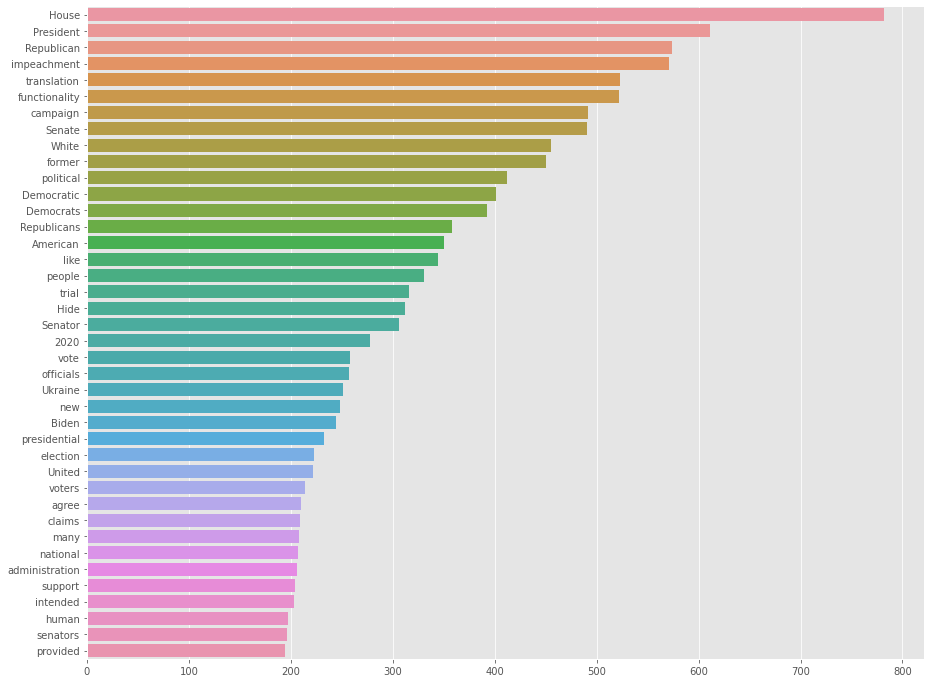

In [180]:
sns.barplot(x=y,y=x)

In [0]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

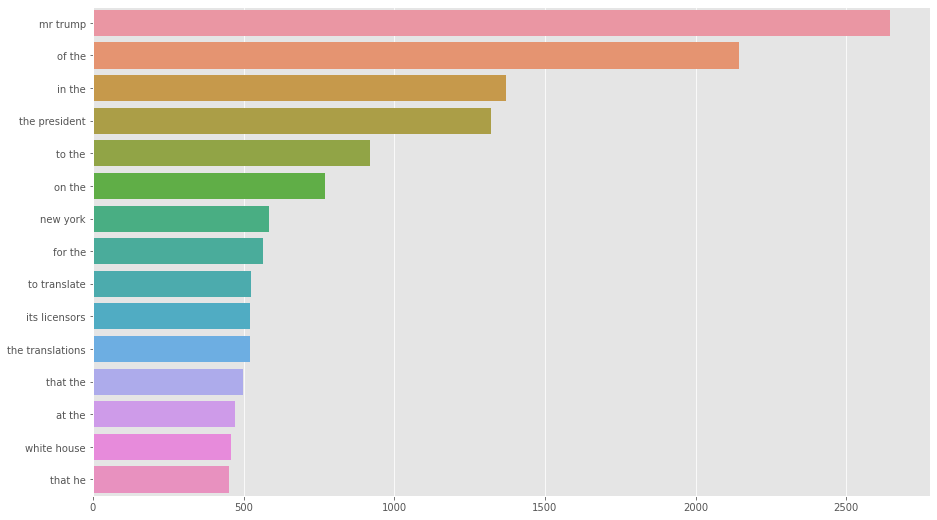

In [168]:
plt.figure(figsize=(15,9))
top_bigrams=get_top_bigrams(trump_text)[:15]
x,y=map(list,zip(*top_bigrams))
sns.barplot(x=y,y=x)

In [202]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 10300000
doc = nlp(trump_join)

for entity in doc.ents:
    print(f"{entity.text} ({entity.label_})")

Streaming output truncated to the last 5000 lines.
Chinese (NORP)
Washington (GPE)
American (NORP)
Senegal (PERSON)
Angola (GPE)
Ethiopia (GPE)
American (NORP)
American (NORP)
China's (GPE)
Angolans (NORP)
Pompeo (PERSON)
Angolan (GPE)
Luanda (PERSON)
Pompeo (PERSON)
Pompeo (ORG)
China (GPE)
Africa (LOC)
Trump (PERSON)
the United States (GPE)
West Africa (GPE)
early February (DATE)
Trump (PERSON)
nearly a quarter (CARDINAL)
Africa (LOC)
1.2 billion (CARDINAL)
Nigeria (GPE)
China (GPE)
Russia (GPE)
the United States (GPE)
African (NORP)
China (GPE)
Russia (GPE)
Trump (PERSON)
African (NORP)
American (NORP)
Trump (PERSON)
Africa (LOC)
China (GPE)
Russia (GPE)
Aubrey Hruby (PERSON)
the Atlantic Council's (ORG)
Africa Center (FAC)
American (NORP)
Africa (LOC)
Hruby (PERSON)
Barack Obama's (PERSON)
George W. Bush's (PERSON)
Bill Clinton's (PERSON)
African (NORP)
2000 (DATE)
Trump (PERSON)
Africa (LOC)
the past two decades (DATE)
China (GPE)
Africa (LOC)
Kenya (GPE)
Djibouti (GPE)
South Suda

In [0]:
plt.figure(figsize=(15,9))


In [203]:
statements = textacy.extract.semistructured_statements(doc, "Trump")

print("Here are the things I know about Trump:")

for statement in statements:
    subject, verb, fact = statement
    print(f" - {fact}")

Here are the things I know about Trump:
 - a fighter
 - right that he has the power to intervene if he chooses
 - a Racist President
 - not concerned about corruption in Ukraine and elsewhere around the world
 - reluctant to even hear about election interference, and Republicans dislike discussing it publicly
 - not the right person for the job
 - that President Trump has been wrong on
 - almost uniformly in agreement that he should be removed for his behavior
 - not who you are
 - not wrong
 - racist and that he had helped to make racism a bigger problem in the country
 - a motivating factor for turning out African-American Democrats in the 2018 midterm elections
 - then an unknown quantity
 - consistent champions for life," she said, "and their support for the March for Life has been unwavering
 - the first sitting president to speak in person at the annual March for Life
 - not confident about his chances
 - fully aware of his efforts, though the two men never spoke about it
 - worr

In [205]:
# Extract noun chunks that appear
noun_chunks = textacy.extract.noun_chunks(doc, min_freq=3)

# Convert noun chunks to lowercase strings
noun_chunks = map(str, noun_chunks)
noun_chunks = map(str.lower, noun_chunks)

# Print out any nouns that are at least 2 words long
for noun_chunk in set(noun_chunks):
    if len(noun_chunk.split(" ")) > 1:
        print(noun_chunk)

prime minister benjamin netanyahu
1 p.m.
mr. lewandowski
key part
mr. tuberville
political adversaries
foreign power
united states economy
house investigation
kevin mccarthy
former president barack obama
mr. lyman
more time
u.s. economy
federal government
mr. trump's legal team
michael bloomberg
good will
popular vote
senate leader
mr. nadler
election year
homeland security
american allies
senator sanders
president's decision
tuesday night
first lady
two opinion articles
translation functionality
quick dismissal
friday night
ms. hill
impeachment hoax
mr. kemp
self-driving trucks
trump campaign
michael d. shear
president richard m. nixon
conference call
vice president mike pence
president's behavior
by t.j. kirkpatrick
business owner
thursday morning
new jersey
ballot box
russia's interference
2016 campaign
mr. mnuchin
mr. trump's trial
public health officials
coveted white house meeting
representative doug collins
criminal justice system
john bolton
(photographs by doug mills
capitol h

In [0]:
from IPython.display import Image
mask = Image('trump.png')

In [0]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

In [227]:
# Create WordCloud Object
wc = WordCloud(background_color="white",
                 font_path="titilium.ttf", 
                 width=853, height=506, colormap=cmap)
wc.generate(statements)




TypeError: ignored

In [0]:
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")